In [29]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

model = tf.keras.models.Sequential()
# input layer
model.add(tf.keras.layers.Flatten())
# hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2645 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1069 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9777


In [30]:
val_loss,val_acc = model.evaluate(X_test,y_test)
val_loss,val_acc

313/313 [==============================] - 1s 1ms/step - loss: 0.0876 - accuracy: 0.9733


(0.0876353308558464, 0.9732999801635742)

In [15]:
model.save('my_image_classifier_keras.model')

INFO:tensorflow:Assets written to: my_image_classifier_keras.model/assets


In [34]:
preds = model.predict([X_test])
preds

Consider rewriting this model with the Functional API.


array([[6.3776978e-10, 9.0022610e-08, 4.1071744e-06, ..., 9.9998331e-01,
        5.9730887e-08, 1.9859188e-07],
       [6.6821890e-08, 3.1499011e-03, 9.9666518e-01, ..., 6.0104033e-09,
        5.3474391e-06, 4.1128331e-10],
       [1.0827424e-07, 9.9978119e-01, 1.4410109e-05, ..., 4.2470234e-05,
        1.1537596e-04, 4.6251016e-06],
       ...,
       [9.7547904e-08, 4.0046334e-06, 4.9357521e-08, ..., 9.5777417e-05,
        5.5733994e-06, 1.5644221e-04],
       [2.0579417e-05, 5.0288959e-06, 1.6491865e-07, ..., 2.8219288e-06,
        5.3397380e-03, 3.1256288e-06],
       [1.0233730e-06, 9.4412620e-08, 2.0375144e-07, ..., 1.2258100e-10,
        6.0059983e-07, 4.9837716e-08]], dtype=float32)

In [35]:
import numpy as np

np.argmax(preds[0])

7

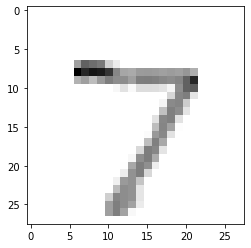

In [33]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0],cmap=plt.cm.binary)